# introduction to scikit learn



0. An end-to end scikit learn work flow
1. Getting the data ready.
2. Choose the righ algorithm/estimator.
3. Fit the Model/Algoritm and use it to make predictions on our data.
4.Evaluate a model.
5. Improve a model.
6. Save and load trained model.
7.Putting it together.

# 0. An end-to- end SciKit-Learn workflow

In [1]:
import numpy as np

In [2]:
# 1. get the data ready

import pandas as pd
heart_disease= pd.read_csv("ML Course/data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Create X (feature matrix)

X = heart_disease.drop("target", axis = 1)

# create Y (labels)

y = heart_disease["target"]

In [4]:
import warnings
warnings.filterwarnings("default")

In [5]:
# 2. choose the right model and hyperparameters

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)

# We'll keep the default hyperparameters

clf.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
# fit the model to the tranining data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2)

In [7]:
import sklearn
sklearn.show_versions()


System:
    python: 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\Abdelrahman\anaconda3\python.exe
   machine: Windows-10-10.0.19042-SP0

Python dependencies:
          pip: 21.2.4
   setuptools: 58.0.4
      sklearn: 0.24.2
        numpy: 1.20.3
        scipy: 1.7.1
       Cython: 0.29.24
       pandas: 1.3.4
   matplotlib: 3.4.3
       joblib: 1.1.0
threadpoolctl: 2.2.0

Built with OpenMP: True


In [8]:
clf.fit(X_train, y_train);

In [9]:
# make a predection

y_label = clf.predict(np.array([0, 2, 3, 4]))

ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [10]:
y_preds = clf.predict(X_test)
y_preds

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0], dtype=int64)

In [11]:
y_test

296    0
136    1
93     1
81     1
31     1
      ..
92     1
60     1
235    0
191    0
244    0
Name: target, Length: 61, dtype: int64

In [12]:
# 4. elevate the model on the training data and test data

clf.score(X_train, y_train)

1.0

In [13]:
clf.score(X_test, y_test)

0.7540983606557377

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.60      0.71        30
           1       0.70      0.90      0.79        31

    accuracy                           0.75        61
   macro avg       0.78      0.75      0.75        61
weighted avg       0.78      0.75      0.75        61



In [15]:
print(confusion_matrix(y_test,y_preds))

[[18 12]
 [ 3 28]]


In [16]:
accuracy_score(y_test, y_preds)

0.7540983606557377

In [24]:
# 5. improve our model

# try a different amount of estimators

np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100: .2f}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set:  70.49%

Trying model with 20 estimators...
Model accuracy on test set:  80.33%

Trying model with 30 estimators...
Model accuracy on test set:  81.97%

Trying model with 40 estimators...
Model accuracy on test set:  78.69%

Trying model with 50 estimators...
Model accuracy on test set:  78.69%

Trying model with 60 estimators...
Model accuracy on test set:  80.33%

Trying model with 70 estimators...
Model accuracy on test set:  78.69%

Trying model with 80 estimators...
Model accuracy on test set:  78.69%

Trying model with 90 estimators...
Model accuracy on test set:  78.69%



In [25]:
# 6. save a model and load it

import pickle

pickle.dump(clf, open("random_forst_model_1.pkl", "wb"))

C:\Users\ABDELR~1\AppData\Local\Temp/ipykernel_12052/3479363957.py:5: ResourceWarning: unclosed file <_io.BufferedWriter name='random_forst_model_1.pkl'>
  pickle.dump(clf, open("random_forst_model_1.pkl", "wb"))


In [26]:
loaded_model = pickle.load(open("random_forst_model_1.pkl", "rb"))
loaded_model.score(X_test, y_test)

C:\Users\ABDELR~1\AppData\Local\Temp/ipykernel_12052/131783122.py:1: ResourceWarning: unclosed file <_io.BufferedReader name='random_forst_model_1.pkl'>
  loaded_model = pickle.load(open("random_forst_model_1.pkl", "rb"))


0.7868852459016393

In [27]:
what_we_are_covering = [
    "0. An end-to end scikit learn work flow", 
    "1. Getting the data ready.", 
    "2. Choose the righ algorithm/estimator.",
    "3. Fit the Model/Algoritm and use it to make predictions on our data.",
    "4.Evaluate a model.",
    "5. Improve a model.",
    "6. Save and load trained model.",
    "7.Putting it together."]
    
what_we_are_covering


['0. An end-to end scikit learn work flow',
 '1. Getting the data ready.',
 '2. Choose the righ algorithm/estimator.',
 '3. Fit the Model/Algoritm and use it to make predictions on our data.',
 '4.Evaluate a model.',
 '5. Improve a model.',
 '6. Save and load trained model.',
 '7.Putting it together.']

In [28]:
what_we_are_covering

['0. An end-to end scikit learn work flow',
 '1. Getting the data ready.',
 '2. Choose the righ algorithm/estimator.',
 '3. Fit the Model/Algoritm and use it to make predictions on our data.',
 '4.Evaluate a model.',
 '5. Improve a model.',
 '6. Save and load trained model.',
 '7.Putting it together.']

In [17]:
# standard imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Getting our data ready to be used with machine learning

Three main steps we need to do:                                                                                                    
    1. Splitting the data into features and labels(usually 'x', and 'y').                                                         
    2. Filling (aslo called imputing) or disregarding missing values.                                                            
    3. converting non-numerical values to numerical values (called feature coding).

In [18]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
X = heart_disease.drop("target", axis = 1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [20]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [21]:
# split the data into training and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2)

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [23]:
X.shape

(303, 13)

## 1.1 make sure that all values are numerical

In [29]:
car_sales = pd.read_csv("ML Course/data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [30]:
len(car_sales)

1000

In [31]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [32]:
## split into X/y

X = car_sales.drop("Price", axis = 1)
y = car_sales["Price"]

## split into train and test

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.2)

In [33]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Honda'

In [34]:
# turn the categories into number

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = [ "Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer ([("one_hot",
                                 one_hot,
                                 categorical_features)], 
                                remainder = "passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [35]:
pd.DataFrame(transformed_X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0


In [36]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies.head()

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0


In [38]:
# now we will refit the model

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                   y,
                                                   test_size = 0.2)

model.fit(X_train, y_train)

RandomForestRegressor()

In [37]:
model.score(X_test, y_test)

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

### What if there a missing value

1. fill them with some value (imputation)
2. Remove the samples with the missing data altogether.

In [39]:
## import car sales missing data

car_sales_missing = pd.read_csv("ML Course/data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [40]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [41]:
# create X and y

X= car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [42]:
# lets try and convert our data into numbers
# turn the categories into number

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = [ "Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer ([("one_hot",
                                 one_hot,
                                 categorical_features)], 
                                remainder = "passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [43]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


## Option 1. Fill missing data with Pandas

In [44]:
# fill the "make" column
car_sales_missing["Make"].fillna("missing", inplace = True)


# fill the colour column
car_sales_missing["Colour"].fillna("missing", inplace = True)

# fill the Odometer column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace= True)

# fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace = True)

In [45]:
# check our dataframe again

car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [46]:
#remove rows with missing price value

car_sales_missing.dropna(inplace=True)
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [47]:
len(car_sales_missing)

950

In [48]:
X = car_sales_missing.drop("Price", axis =1)
y = car_sales_missing["Price"]

In [ ]:
# lets try and convert our data into numbers
# turn the categories into number

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = [ "Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer ([("one_hot",
                                 one_hot,
                                 categorical_features)], 
                                remainder = "passthrough")

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

# Option:2 is filling missing data with scikit learn

In [49]:
car_sales_missing = pd.read_csv("ML Course/data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [50]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [51]:
# drop the rwos with no labels

car_sales_missing.dropna(subset = ["Price"], inplace = True)
car_sales_missing.isna().sum()


Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [52]:
#split into X and y

X = car_sales_missing.drop(["Price"], axis = 1)
y = car_sales_missing["Price"]

In [53]:
# fill missing vales with Scikit-Learn

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# fill categorial values with missing and numerical values with mean

cat_imputer = SimpleImputer(strategy="constant", fill_value = "missing")
door_imputer = SimpleImputer(strategy = "constant", fill_value = 4)
num_imputer = SimpleImputer(strategy = "mean")

# Define columns

cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]


# Create an imputer (smth that fills missing data)

imputer = ColumnTransformer ([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

# Transform the data

filled_X = imputer.fit_transform (X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [54]:
car_sales_filled = pd.DataFrame(filled_X,
                               columns = ["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [55]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [56]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = [ "Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer ([("one_hot",
                                 one_hot,
                                 categorical_features)], 
                                remainder = "passthrough")

transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [58]:
# now we got our data as number and filled ( no missing values)
# let's fit a model

np.random.seed(42)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X, 
                                                   y, 
                                                   test_size = 0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.21990196728583944

In [59]:
what_we_are_covering

['0. An end-to end scikit learn work flow',
 '1. Getting the data ready.',
 '2. Choose the righ algorithm/estimator.',
 '3. Fit the Model/Algoritm and use it to make predictions on our data.',
 '4.Evaluate a model.',
 '5. Improve a model.',
 '6. Save and load trained model.',
 '7.Putting it together.']

## 2. find the right algorithm/estimator for your problem

Some things to note

* sklearn refers to machine learning models, algorithms and estimators.
* classification problem - predicting a category(heart disease or not)
  * sometimes you'll see 'clf' ( short for classifier) used as a classification estimator.
* Regression problem - predicting a number (selling price for a car)

if you are working on a machine learning problem and looking to use sklearn and not sure what model you should use, refer to the sklearn machine learning map
    


# 2.1 Picking a machine learning model for a regression problem

let's use the California Housing dataset

In [60]:
# Get california housing dataset

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [61]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [62]:
housing_df["MedHouseVal"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [63]:
housing_df = housing_df.drop("MedHouseVal", axis = 1 )

In [64]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [65]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [88]:
#Import algorithm
from sklearn.linear_model import Ridge
# setup random seed
np.random.seed(42)
# create the data

X = housing_df.drop("target", axis = 1)
y = housing_df["target"]


# split into train and test sets

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2)


# initiate and fit the model ( on the training test)

model = Ridge()
model.fit(X_train, y_train)
model.score(X_test, y_test)


0.5758549611440126

What if Ridge didn't work or score did not fit our needs
well, we can always try a different model

In [89]:
# Import the RandomForest Regressor from ensemble modeule

from sklearn.ensemble import RandomForestRegressor

# setup random seed
np.random.seed(42)

# create the data

X = housing_df.drop("target", axis = 1)
y = housing_df["target"]

# split into train, test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# create random forest model

clf = RandomForestRegressor()
clf.fit = (X_train, y_train)
clf.score = (X_test, y_test)


# consulting the map and it says to try linearSVC

## Hello

In [69]:
# import linear SVC estimator class

from sklearn.svm import LinearSVC

# setup random seeds

np.random.seed(42)

# make the data

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

#split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#create the model

clf = LinearSVC()
clf.fit = (X_train, y_train)
clf.score = (X_test, y_test)

In [76]:


from sklearn.svm import LinearSVC



np.random.seed(42)



X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)



clf = LinearSVC()
clf.fit = (X_train, y_train)
clf.score = (X_test, y_test)

In [73]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [77]:
what_we_are_covering

['0. An end-to end scikit learn work flow',
 '1. Getting the data ready.',
 '2. Choose the righ algorithm/estimator.',
 '3. Fit the Model/Algoritm and use it to make predictions on our data.',
 '4.Evaluate a model.',
 '5. Improve a model.',
 '6. Save and load trained model.',
 '7.Putting it together.']

## 3. Fit the model/algorithm and used to make predictions

# 3.1 fit model to the data

 x = features, feature variables, data
 y = labels, targets, target variables

In [79]:
from sklearn.ensemble import RandomForestRegressor

# setup random seed
np.random.seed(42)

# create the data

X = housing_df.drop("target", axis = 1)
y = housing_df["target"]

# split into train, test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# create random forest model

model = RandomForestRegressor()
model.fit = (X_train, y_train)
model.score = (X_test, y_test)

In [80]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [82]:
y.tail()

20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, dtype: float64

## make predictions using machine learning model

2 ways to make predictions

1. Predict()
2. Predict_proba()

In [140]:
# import linear SVC estimator class

from sklearn.ensemble import RandomForestClassifier

# setup random seeds

np.random.seed(42)

# make the data

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

#split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#create the model

clf = RandomForestClassifier()
clf.fit = (X_train, y_train)
clf.score = (X_test, y_test)

In [92]:
X = heart_disease.drop("target", axis = 1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [93]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [94]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [110]:
# import linear SVC estimator class

from sklearn.ensemble import RandomForestRegressor

# setup random seeds

np.random.seed(42)

# make the data

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

#split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#create the model

clf = RandomForestRegressor()
clf.fit = (X_train, y_train)
clf.score = (X_test, y_test)

# use a trained model to make predictions

In [97]:
clf.predict(np.array([1,7,8,3,4]))

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [98]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [100]:
clf.predict(X_test)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [102]:
np.array([y_test])

array([[0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]], dtype=int64)

In [104]:
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [106]:
clf.score(X_test, y_test)

TypeError: 'tuple' object is not callable

In [107]:
from sklearn.metrics import accuracy_score

In [108]:
accuracy_score(y_test, y_preds)

0.5737704918032787

In [109]:
clf.predict_proba(X_test[:5])

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [112]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis = 1)
y = housing_df ["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)



y_preds = model.predict(X_test)


In [113]:
y_preds[:10]

array([0.4943   , 0.7642   , 4.9346864, 2.56113  , 2.29764  , 1.6625701,
       2.34127  , 1.66352  , 2.48233  , 4.843458 ])

In [115]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [116]:
len(y_preds) , len(y_test)

(4128, 4128)

In [117]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.3267155795542638

In [119]:
housing_df["target"].head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: target, dtype: float64

In [120]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop(["target"])
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor

model.fil(X_train, y_train)
    

KeyError: "['target'] not found in axis"

In [121]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [131]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop(["target"], axis = 1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=50)

model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=50)

In [128]:
model.score(X_test, y_test)

0.7009543943821965

In [132]:
model.score(X_test, y_test)

0.8033658310042728

In [134]:
y_test.mean()

2.0550030959302275

In [143]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

# setup random seeds

np.random.seed(42)

# make the data

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

#split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#create the model

clf = RandomForestClassifier(n_estimators=100)
clf.fit = (X_train, y_train)


In [144]:
clf.score(X_test,y_test)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [145]:
cross_val_score(clf, X, y)

array([0.83606557, 0.91803279, 0.78688525, 0.78333333, 0.78333333])

In [146]:
 cross_val_score(clf, X, y, cv = 10)

array([0.83870968, 0.83870968, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.76666667, 0.9       , 0.73333333, 0.83333333])

In [147]:
np.random.seed(42)

clf_single_score = clf.score(X_test, y_test)

clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

clf_single_score, clf_cross_val_score

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report



In [148]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [156]:
np.random.seed(42)

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

clf = RandomForestClassifier ()
cross_val_score(clf, X, y, cv=5)

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [157]:
np.mean(cross_val_score)

TypeError: unsupported operand type(s) for /: 'function' and 'int'

In [152]:
print(f"Heart Disease Classifier Accuracy: {np.mean(cross_val_score) *100: .2f}%")

TypeError: unsupported operand type(s) for /: 'function' and 'int'

In [159]:
from sklearn.metrics import roc_curve

clf.fit(X_train, y_train)

y_probs = clf.predict_proba(X_test)

y_probs[:10]

array([[0.87, 0.13],
       [0.41, 0.59],
       [0.45, 0.55],
       [0.89, 0.11],
       [0.19, 0.81],
       [0.14, 0.86],
       [0.4 , 0.6 ],
       [0.96, 0.04],
       [1.  , 0.  ],
       [0.43, 0.57]])

In [160]:
y_probs_positive = y_probs[:,1]
y_probs_positive

array([0.13, 0.59, 0.55, 0.11, 0.81, 0.86, 0.6 , 0.04, 0.  , 0.57, 0.77,
       0.29, 0.91, 0.07, 0.94, 0.96, 0.99, 0.14, 0.04, 0.05, 0.5 , 0.16,
       0.64, 0.69, 0.69, 0.64, 0.8 , 0.77, 0.14, 0.86, 0.1 , 0.05, 0.05,
       0.36, 0.51, 0.12, 0.51, 0.87, 0.69, 0.87, 0.86, 0.83, 0.81, 0.64,
       0.71, 0.19, 0.64, 1.  , 0.17, 0.03, 0.16, 0.17, 0.77, 0.7 , 0.17,
       0.07, 0.35, 1.  , 0.11, 0.  , 0.14])

In [161]:
# calculate fpr, tpr and thresholds

fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# check the false positive right

fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.13793103, 0.13793103, 0.17241379, 0.17241379,
       0.17241379, 0.17241379, 0.20689655, 0.20689655, 0.24137931,
       0.34482759, 0.4137931 , 0.51724138, 0.5862069 , 0.65517241,
       0.65517241, 0.72413793, 0.82758621, 0.89655172, 0.93103448,
       1.        ])

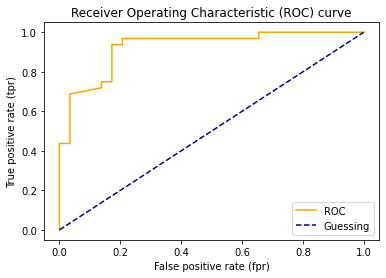

In [163]:
# create the function for plotting the ROC curves

import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    
    # plot roc curve
    plt.plot(fpr, tpr, color = "orange", label="ROC")
    
    # plot line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color = "darkblue", linestyle = "--", label="Guessing")
    
    #Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [164]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9251077586206896

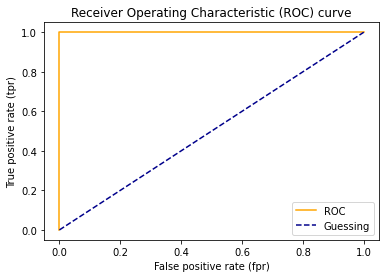

In [165]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [166]:
# perfect auc score
roc_auc_score(y_test, y_test)

1.0

## Confusion matric

A it is quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence is given you an idea where the model is getting confused.


In [167]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [168]:
# visualize confusion matrix with pd.crosstab()

pd.crosstab(y_test,
           y_preds,
           rownames = [ "Actual Labels"],
           colnames = ["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,4,28


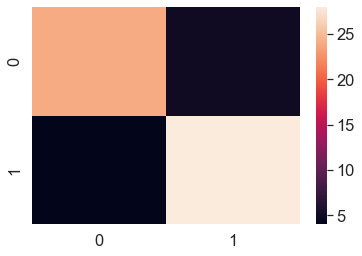

In [170]:
# make our confusion matrix more visual with seaborn heatmap()

import seaborn as sns

# set the font for scale

sns.set(font_scale = 1.5)

# create a confusion matrix

conf_mat = confusion_matrix(y_test, y_preds)

# plot it using Seaborn

sns.heatmap(conf_mat);

In [172]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator = clf, X=X, y=y)

AttributeError: type object 'ConfusionMatrixDisplay' has no attribute 'from_estimator'

In [173]:
ConfusionMatrixDisplay.from_predictions(y_true = y_test,
                                       y_pred = y_preds)

AttributeError: type object 'ConfusionMatrixDisplay' has no attribute 'from_predictions'

In [174]:
import sklearn
sklearn.__version__

'0.24.2'

In [175]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [177]:
disease_true = np.zeros(10000)
disease_true[0] = 1

disease_preds = np.zeros(10000)

pd.DataFrame(classification_report(disease_true, 
                                  disease_preds,
                                  output_dict = True))

C:\Users\Abdelrahman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Abdelrahman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Abdelrahman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


In [179]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X= housing_df.drop(["target"], axis = 1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = RandomForestRegressor(n_estimators = 100)

model.fit(X_train, y_train)


RandomForestRegressor()

In [180]:
model.score(X_test, y_test)

0.8057655811971304

In [181]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [182]:
y_test


20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [183]:
y_test.mean()

2.0550030959302275

In [184]:
from sklearn.metrics import r2_score

y_test_mean = np.full(len(y_test), y_test.mean())

In [185]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [186]:
r2_score(y_true = y_test,
        y_pred = y_test_mean)

0.0

In [187]:
r2_score(y_true = y_test,
        y_pred = y_test)

1.0

### Mean absolute error (MAE)
## it is the avarege of the absolute differences between predictions and actual values

In [188]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)

mae = mean_absolute_error(y_test, y_preds)
mae

0.3267155795542638

In [189]:
y_preds

array([0.4943   , 0.7642   , 4.9346864, ..., 4.8447587, 0.71681  ,
       1.64972  ])

In [190]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [191]:
df = pd.DataFrame(data = {"actual values": y_test,
                         "predicted values": y_preds})

df["differences"] = df["predicted values"]- df["actual values"]
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.494300,0.017300
3024,0.45800,0.764200,0.306200
15663,5.00001,4.934686,-0.065324
20484,2.18600,2.561130,0.375130
9814,2.78000,2.297640,-0.482360
13311,1.58700,1.662570,0.075570
7113,1.98200,2.341270,0.359270
7668,1.57500,1.663520,0.088520
18246,3.40000,2.482330,-0.917670
5723,4.46600,4.843458,0.377458


In [192]:
df["differences"].mean()

0.011785718313953078

In [193]:
# MAE using formulas and difference

np.abs(df["differences"]).mean()

0.326715579554263

** Mean squared error (MSE) **

MSE is the mean of square of the errors between actual and predicted values.

In [194]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.25452652628268335

In [195]:
df ["squared_differences"] = np.square(df["differeneces"])
df.head()

KeyError: 'differeneces'

In [196]:
# Calculate MSE by hand

squared = np.squared(df["differences"])
squared.mean()

AttributeError: module 'numpy' has no attribute 'squared'

In [197]:
df["squared_differences"].mean()

KeyError: 'squared_differences'

## 4.2.3 Finally using the scoring parameter

In [198]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X= heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators = 100)

In [199]:
np.random.seed(42)

# Cross validation

cv_acc = cross_val_score(clf, X, y, cv=5, scoring = None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [201]:
# cross validated accuracy

print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100: .2f}%")

The cross-validated accuracy is:  82.48%


In [202]:
# precision 

cv_precision = cross_val_score(clf, X, y , cv=5, scoring="precision")
cv_precision

array([0.76315789, 0.90322581, 0.83870968, 0.79411765, 0.74358974])

In [204]:
# cross validated accuracy

print(f"The cross-validated precision is: {np.mean(cv_precision)}")

The cross-validated precision is: 0.8085601538512754


In [205]:
# Recall

cv_recall = cross_val_score(clf, X, y, cv=5, scoring ="recall")
cv_recall

array([0.87878788, 0.84848485, 0.78787879, 0.78787879, 0.90909091])

In [206]:
# cross validated accuracy

print(f"The cross-validated recall is: {np.mean(cv_recall)}")

The cross-validated recall is: 0.8424242424242424


# Lets see the 'scoring' parameter to be used for the regression problem.

In [207]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis = 1)
y = housing_df["target"]

model = RandomForestRegressor(n_estimators = 100)

In [208]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=3, scoring = None)
np.mean(cv_r2)

0.6538316966195948

In [209]:
# mean absolute error

cv_mae = cross_val_score(model, X, y, cv=3, scoring ="neg_mean_squared_error")
np.mean(cv_mae)

-0.46256628560500396

In [216]:
cv_mae

array([-0.5174972 , -0.42274574, -0.50715165])

In [215]:
#mean absolute error
cv_mae = cross_val_score(model, X, y, cv=3, scoring = "neg_mean_absolute_error")
np.mean(cv_mae)

-0.4824648612693799

In [213]:
#mean square error
cv_mse = cross_val_score(model, X, y, cv=3, scoring = "neg_mean_squared_error")
np.mean(cv_mse)

-0.45742396954569725

In [217]:
cv_mse

array([-0.5079106 , -0.33076962, -0.53359169])

In [218]:
cv_mse

array([-0.5079106 , -0.33076962, -0.53359169])

In [225]:
# Using different evaluation metrics as SciKit-Learn functions

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf=RandomForestClassifier()

clf.fit(X_train, y_train)

y_preds = clf.predict(X_test)

print("Classifier metrics on the test set")
print(f"Accuracy:{accuracy_score(y_test, clf.predict(X_test))*100:.2f}%")
print(f"Precision:{precision_score(y_test, clf.predict(X_test))}")
print(f"Recall:{recall_score(y_test, clf.predict(X_test))}")
print(f"F1:{f1_score(y_test, clf.predict(X_test))}")

Classifier metrics on the test set
Accuracy:85.25%
Precision:0.8484848484848485
Recall:0.875
F1:0.8615384615384615


In [234]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

#create X and y

X = housing_df.drop("target", axis = 1)
y = housing_df["target"]

# split data

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2)

# create model

model = RandomForestRegressor()

# fit model
model.fit(X_train, y_train)

# model prediction

y_pred = model.predict(X_test)

# evaluate model using evaluation function

print("Regression metrics on the test set")
print(f"R2 score: {r2_score(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test,y_pred)}")
      

Regression metrics on the test set
R2 score: 0.8057655811971304
MAE: 0.3267155795542638
MSE: 0.25452652628268335


In [235]:
what_we_are_covering

['0. An end-to end scikit learn work flow',
 '1. Getting the data ready.',
 '2. Choose the righ algorithm/estimator.',
 '3. Fit the Model/Algoritm and use it to make predictions on our data.',
 '4.Evaluate a model.',
 '5. Improve a model.',
 '6. Save and load trained model.',
 '7.Putting it together.']

## Tunning hyperparameters by hand 

In [237]:
## lets make 3 steps training, validation and testing

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

we are going to try and adjust

* 'max_depth'
* 'max_feature'
* 'min_samples_leaf'
* 'min_sample_split'
* 'n_estimators'

In [241]:
%%html
<style type= "text/css">
.CodeMirror {
    font-size: 16px;
}
</style>

In [250]:
def evaluate_preds(y_true, y_preds):
    
    """"
    
    Performs evaluation comparison on y_true labels vs y_pred labels
    on a classification.
    
    """
    
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score (y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                  "precision": round (precision, 2),
                  "recall": round(f1,2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision: .2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:2f}")
    
    return metric_dict

In [252]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# shuffle the data

heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X & y

X = heart_disease_shuffled.drop("target", axis = 1)
y = heart_disease_shuffled["target"]

# Split the data into train, validation and test sets

train_split = round (0.7 * len(heart_disease_shuffled))
valid_split = round(train_split + 0.15 *len(heart_disease_shuffled))
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[:valid_split]

clf = RandomForestClassifier()

clf.fit(X_train, y_train)
# make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 82.22%
Precision:  0.81
Recall: 0.88
F1 score: 0.846154


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.85}

In [253]:
np.random.seed(42)

clf_2 = RandomForestClassifier(n_estimators = 100)
clf_2.fit(X_train,y_train)

y_preds_2 = clf_2.predict(X_valid)

clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc: 82.22%
Precision:  0.84
Recall: 0.84
F1 score: 0.840000


### Hyperparameters tunning with RandomizedSearchCV

In [257]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10,100,200,500,1000,1200],
       "max_depth": [None, 5, 10, 20, 30],
       "max_features": ["auto", "sqrt"],
       "min_samples_split": [2,4,6],
       "min_samples_leaf": [1,2,4]}

np.random.seed(42)

X = heart_disease_shuffled.drop("target", axis = 1)
y = heart_disease_shuffled["target"]

# split into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Instantiate RandomForestClassifier

clf = RandomForestClassifier(n_jobs=1)

# Setup RandominzedSearchCV

rs_clf = RandomizedSearchCV(estimator = clf,
                           param_distributions = grid,
                           n_iter = 10,
                           cv = 5,
                           verbose = 2)


# fit the RandomizedSearchCV version of clf

rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.7s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

In [258]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [268]:
# Make predictions with the best hyperparameters

rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions

rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 81.97%
Precision:  0.77
Recall: 0.86
F1 score: 0.813559


### 5.3 Hyperparameters tuning with GridSearchCV

In [260]:
grid 

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [272]:
grid_2 = {"n_estimators": [100,200,500],
       "max_depth": [None ],
       "max_features": [ "sqrt"],
       "min_samples_split": [6],
       "min_samples_leaf": [1,2]}

In [262]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

X = heart_disease_shuffled.drop("target", axis = 1)
y = heart_disease_shuffled["target"]

# split into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Instantiate RandomForestClassifier

clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV

gs_clf = GridSearchCV(estimator = clf,
                           param_grid = grid_2,
                           cv = 5,
                           verbose = 2)


# fit the GridSearchCV version of clf

gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

In [273]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [274]:
gs_y_preds = gs_clf.predict(X_test)

#evaluate the predictions

gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 78.69%
Precision:  0.74
Recall: 0.82
F1 score: 0.779661


Let's compare our different model metrics

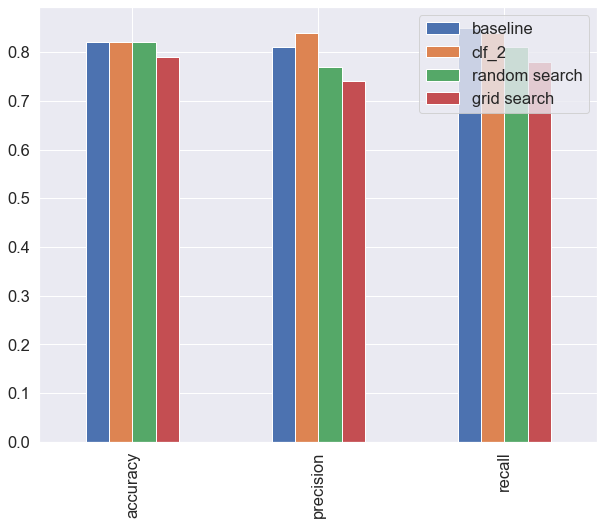

In [275]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                              "clf_2": clf_2_metrics,
                              "random search": rs_metrics,
                              "grid search": gs_metrics})

compare_metrics.plot.bar(figsize=(10,8));

## 6. Saving and loading trained machine learning models

Two ways to save an load machine learning models:
    
1. With Python's a 'pickle' module.
2. With the 'joblib' module

**Pickle**

In [280]:
import pickle

# save an existing model to file

pickle.dump(gs_clf, open("gs_random_random_forest_model1_1.pkl", "wb"))

C:\Users\ABDELR~1\AppData\Local\Temp/ipykernel_12052/510412389.py:5: ResourceWarning: unclosed file <_io.BufferedWriter name='gs_random_random_forest_model1_1.pkl'>
  pickle.dump(gs_clf, open("gs_random_random_forest_model1_1.pkl", "wb"))


In [281]:
# load a saved model

loaded_pickle_model = pickle.load(open("gs_random_random_forest_model1_1.pkl", "rb"))



C:\Users\ABDELR~1\AppData\Local\Temp/ipykernel_12052/3027134707.py:3: ResourceWarning: unclosed file <_io.BufferedReader name='gs_random_random_forest_model1_1.pkl'>
  loaded_pickle_model = pickle.load(open("gs_random_random_forest_model1_1.pkl", "rb"))


In [282]:
# make some predictions

pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 78.69%
Precision:  0.74
Recall: 0.82
F1 score: 0.779661


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.78}

# Joblib

In [283]:
from joblib import dump, load

# save model to file

dump(gs_clf, filename = 'gs_random_forest_model_1.joblib')

['gs_random_forest_model_1.joblib']

In [286]:
# import a saved joblib model

loaded_joblib_model = load(filename="gs_random_forest_model_1.joblib")

In [287]:
# make and evaluate joblib predictions

joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 78.69%
Precision:  0.74
Recall: 0.82
F1 score: 0.779661


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.78}

# 7. Putting it all together

In [289]:
data = pd.read_csv("ML Course/data/car-sales-extended-missing-data.csv")
data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [290]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [291]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do (all in one cell):
    
1. Fill missing data.
2. Convert data into numbers.
3. Build a model on the data.

In [298]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

#setup random seed

import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels

data = pd.read_csv("ML Course/data/car-sales-extended-missing-data.csv")
data.dropna(subset = ["Price"], inplace = True)

# Define different features and transformer pipline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown = "ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline(steps= [
    ("imputer", SimpleImputer(strategy="constant", fill_value = 4))])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))])

# Setup the pre-processing data( fill missing values then convert to numbers)

preprocessor = ColumnTransformer(
                transformers =[
                    ("cat", categorical_transformer, categorical_features),
                    ("door", door_transformer, door_feature),
                    ("num", numeric_transformer, numeric_features)
                ])


# Create a preprocessing and modelling pipeline

model = Pipeline(steps = [("preprocessor", preprocessor),
                         ("model", RandomForestRegressor())])

# Split data

X = data.drop("Price", axis = 1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Fit and Score the model

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

#### It is also possible to use GridSearchCV or RandomizedSearchCV with our Pipeline

In [300]:
# Use GridSearchCV with our regression pipeline
from sklearn.model_selection import GridSearchCV

pipe_grid = { 
"preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100,1000], 
    "model__max_depth": [None, 5],
    "model__max_features": ["auto"],
    "model__min_samples_split": [2,4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose = 2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_sampl

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.2s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strat

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         

In [301]:
gs_model.score(X_test, y_test)

0.3339554263158365

In [302]:
what_we_are_covering

['0. An end-to end scikit learn work flow',
 '1. Getting the data ready.',
 '2. Choose the righ algorithm/estimator.',
 '3. Fit the Model/Algoritm and use it to make predictions on our data.',
 '4.Evaluate a model.',
 '5. Improve a model.',
 '6. Save and load trained model.',
 '7.Putting it together.']